### -*- News Classification Using Naive Bayes Classifier -*-

In [3]:
#Required imports
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns;sns.set()
from sklearn.datasets import fetch_20newsgroups

#Required Imports For Text Classification
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.naive_bayes import MultinomialNB

In [4]:
#Fetching Data
data = fetch_20newsgroups()
print('Total Number Of Data points: ',len(data.data))

Total Number Of Data points:  11314


In [5]:
#Categories Of Data
categories = data.target_names
print(categories)

['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


In [6]:
#Seperating The Data Into Training And Testing Sets
train = fetch_20newsgroups(subset = 'train', categories = categories)
test = fetch_20newsgroups(subset = 'test', categories = categories)

print('Total Number Of Data Points In Training Set: ',len(train.data))
print('Total Number Of Data Points In Testing Set: ',len(test.data))

Total Number Of Data Points In Training Set:  11314
Total Number Of Data Points In Testing Set:  7532


In [9]:
#Converting Text Data To Tokens
cv = CountVectorizer(stop_words = 'english')
train_tokens = cv.fit_transform(train.data)
test_tokens = cv.transform(test.data)

In [11]:
#Creating Classifier To Predict Data
model = MultinomialNB()
model.fit(train_tokens, train.target)
pred = model.predict(test_tokens)
print('Predictions: ',pred)

Predictions:  [ 7  1  0 ...,  9  3 15]


In [12]:
#Calculating Accuracy
accuracy = accuracy_score(pred, test.target)
print('Accuracy Of The Model: ', accuracy)

Accuracy Of The Model:  0.802310143388


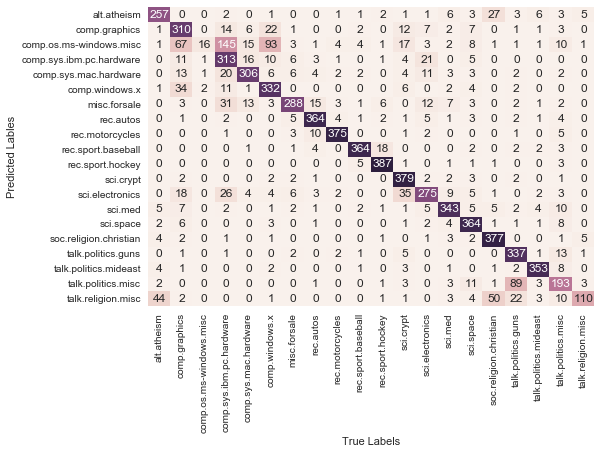

In [13]:
#Lets Create Confusion Matrix
mat = confusion_matrix(test.target, pred)
sns.heatmap(mat, annot = True, cbar=False, fmt = 'd', xticklabels = test.target_names, yticklabels = test.target_names)

plt.xlabel('True Labels')
plt.ylabel('Predicted Lables')

In [14]:
#Function To Predict News Categories
def predict(s):
    trans = cv.transform([s])
    label = model.predict(trans)
    return data.target_names[label[0]]

In [15]:
predict('Nasa Sent Curiosity Rover To Mars')

'sci.space'

In [68]:
predict('Audi Is Better Than Honda')

'rec.autos'